# Лабораторная работа №4
## Проверка статистических гипотез

### Задание
1. Изучить теоретический материал (*см. вложенный .pdf файл, стр. 15 - 19*) +
2. Найти в открытых источниках, или выдумать выборку непрерывных данных. Можно использовать данные из приложенного *.csv* файла. (Описание данных: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download) +
3. Реализовать скрипт в Python для загрузки данных (Воспользоваться Лабораторной №3). +
4. Выдвинуть гипотезу $H_0$ относительно закона распределения, например, *«выборка извлечена из генеральной совокупности со стандартным нормальным распределением»*.
5. Посчитать и вывести основные числовые характеристики выборки (среднее, дисперсию, стандартное отклонение, медиану). +
6. Построить эмпирическую и теоретическую оценки плотности распределения. В примере ниже приведён пример для нормального и асимметричного нормального распределения.
7. Зафиксировать уровень значимости критерия $\alpha$, пользуясь таблицей (см. вложение).
8. Применить критерий $\chi^2$ (можно использовать встроенные функции в Python или Excel) и получить $p-value$. (Пример: https://medstatistic.ru/methods/methods4.html)
9. Сравнить $p-value$ с выбранным уровнем значимости $\alpha$.
10. Отклонить или принять гипотезу $H_0$ в зависимости от знака неравенства $p\lt\alpha$ ($p\gt\alpha$).

In [25]:
#Загрузка данных StudentsPerfomance

import csv
with open('StudentsPerformance.csv', 'r', newline='') as csvfile:
    spamreader = csv.reader(csvfile,  quotechar='|')
    data = [el for el in spamreader]
    [print(i) for i in data[0:10]]

['female', 'group B', "bachelor's degree", 'standard', 'none', '72', '72', '74']
['female', 'group C', 'some college', 'standard', 'completed', '69', '90', '88']
['female', 'group B', "master's degree", 'standard', 'none', '90', '95', '93']
['male', 'group A', "associate's degree", 'free/reduced', 'none', '47', '57', '44']
['male', 'group C', 'some college', 'standard', 'none', '76', '78', '75']
['female', 'group B', "associate's degree", 'standard', 'none', '71', '83', '78']
['female', 'group B', 'some college', 'standard', 'completed', '88', '95', '92']
['male', 'group B', 'some college', 'free/reduced', 'none', '40', '43', '39']
['male', 'group D', 'high school', 'free/reduced', 'completed', '64', '64', '67']
['female', 'group B', 'high school', 'free/reduced', 'none', '38', '60', '50']


In [6]:
#Основные числовые характеристики выборки (среднее, дисперсия, стандартное отклонение, медиана)

def mean(xs): 
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs) 
print(f'Cредний балл по математике:  {mean([int(i[5]) for i in data])}')
print(f'Cредний балл за чтение:  {mean([int(i[6]) for i in data])}')
print(f'Cредний балл за письмо:  {mean([int(i[7]) for i in data])}\n')

def variance(xs):
    '''Дисперсия числового ряда,
       несмещенная дисперсия при n <= 30'''
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, 30) else n  
    square_deviation = lambda x : (x - mu) ** 2 
    return sum( map(square_deviation, xs) ) / n
print(f'Дисперсия для баллов по математике:  {variance([int(i[5]) for i in data])}')
print(f'Дисперсия для баллов за чте  ние:  {variance([int(i[6]) for i in data])}')
print(f'Дисперсия для баллов  за письмо:  {variance([int(i[7]) for i in data])}\n')

import math
def standard_deviation(xs):
    '''Стандартное отклонение числового ряда'''
    return math.sqrt( variance(xs) )
print(f'Стандартное отклонение для баллов по математике:  {standard_deviation([int(i[5]) for i in data])}')
print(f'Стандартное отклонение для баллов за чтение:  {standard_deviation([int(i[6]) for i in data])}')
print(f'Стандартное отклонение для баллов  за письмо:  {standard_deviation([int(i[7]) for i in data])}\n')

def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2
    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] )
print(f'Медианный балл по математике:  {median([int(i[5]) for i in data])}')
print(f'Медианный балл за чтение:  {median([int(i[6]) for i in data])}')
print(f'Медианный балл за письмо:  {median([int(i[7]) for i in data])}')




Cредний балл по математике:  66.089
Cредний балл за чтение:  69.169
Cредний балл за письмо:  68.054

Дисперсия для баллов по математике:  229.68907900000048
Дисперсия для баллов за чте  ние:  212.9524390000001
Дисперсия для баллов  за письмо:  230.6770839999997

Стандартное отклонение для баллов по математике:  15.155496659628165
Стандартное отклонение для баллов за чтение:  14.59289001534652
Стандартное отклонение для баллов  за письмо:  15.188057281956757

Медианный балл по математике:  66.0
Медианный балл за чтение:  70.0
Медианный балл за письмо:  69.0


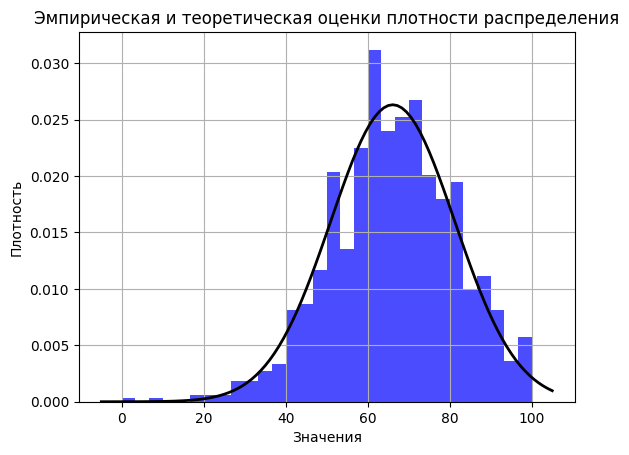

p value is 1.0
Independent (H0 holds true)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm
from scipy.stats import chi2_contingency

# Строим эмпирическую оценку плотности распределения
plt.hist([int(i[5]) for i in data], bins=30, density=True, alpha=0.7, color='blue')

# Строим теоретическую оценку плотности распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean([int(i[5]) for i in data]), standard_deviation([int(i[5]) for i in data]))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Эмпирическая и теоретическая оценки плотности распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

a = [[int(i[5]) for i in data],[int(i[6]) for i in data]]
stat, p, dof, expected = chi2_contingency(a)
# interpret p-value
alpha = 0.05
print ( "p value is " + str (p))
# Выдвигаем гипотезу H0
# Гипотеза: Выборка извлечена из генеральной совокупности со отрицательно ассиметричное распределение
if p <= alpha:
    print ( 'Dependent (reject H0)' )
else :
    print ( 'Independent (H0 holds true)' )
